# Credit Card Fraud Detection

#### Import the modules needed.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [14]:
df = pd.read_csv('/content/creditcard.csv')


In [15]:
df = pd.read_csv("creditcard.csv")

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

There are 284807 rows and 31 columns are present in the Data Set


In [19]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


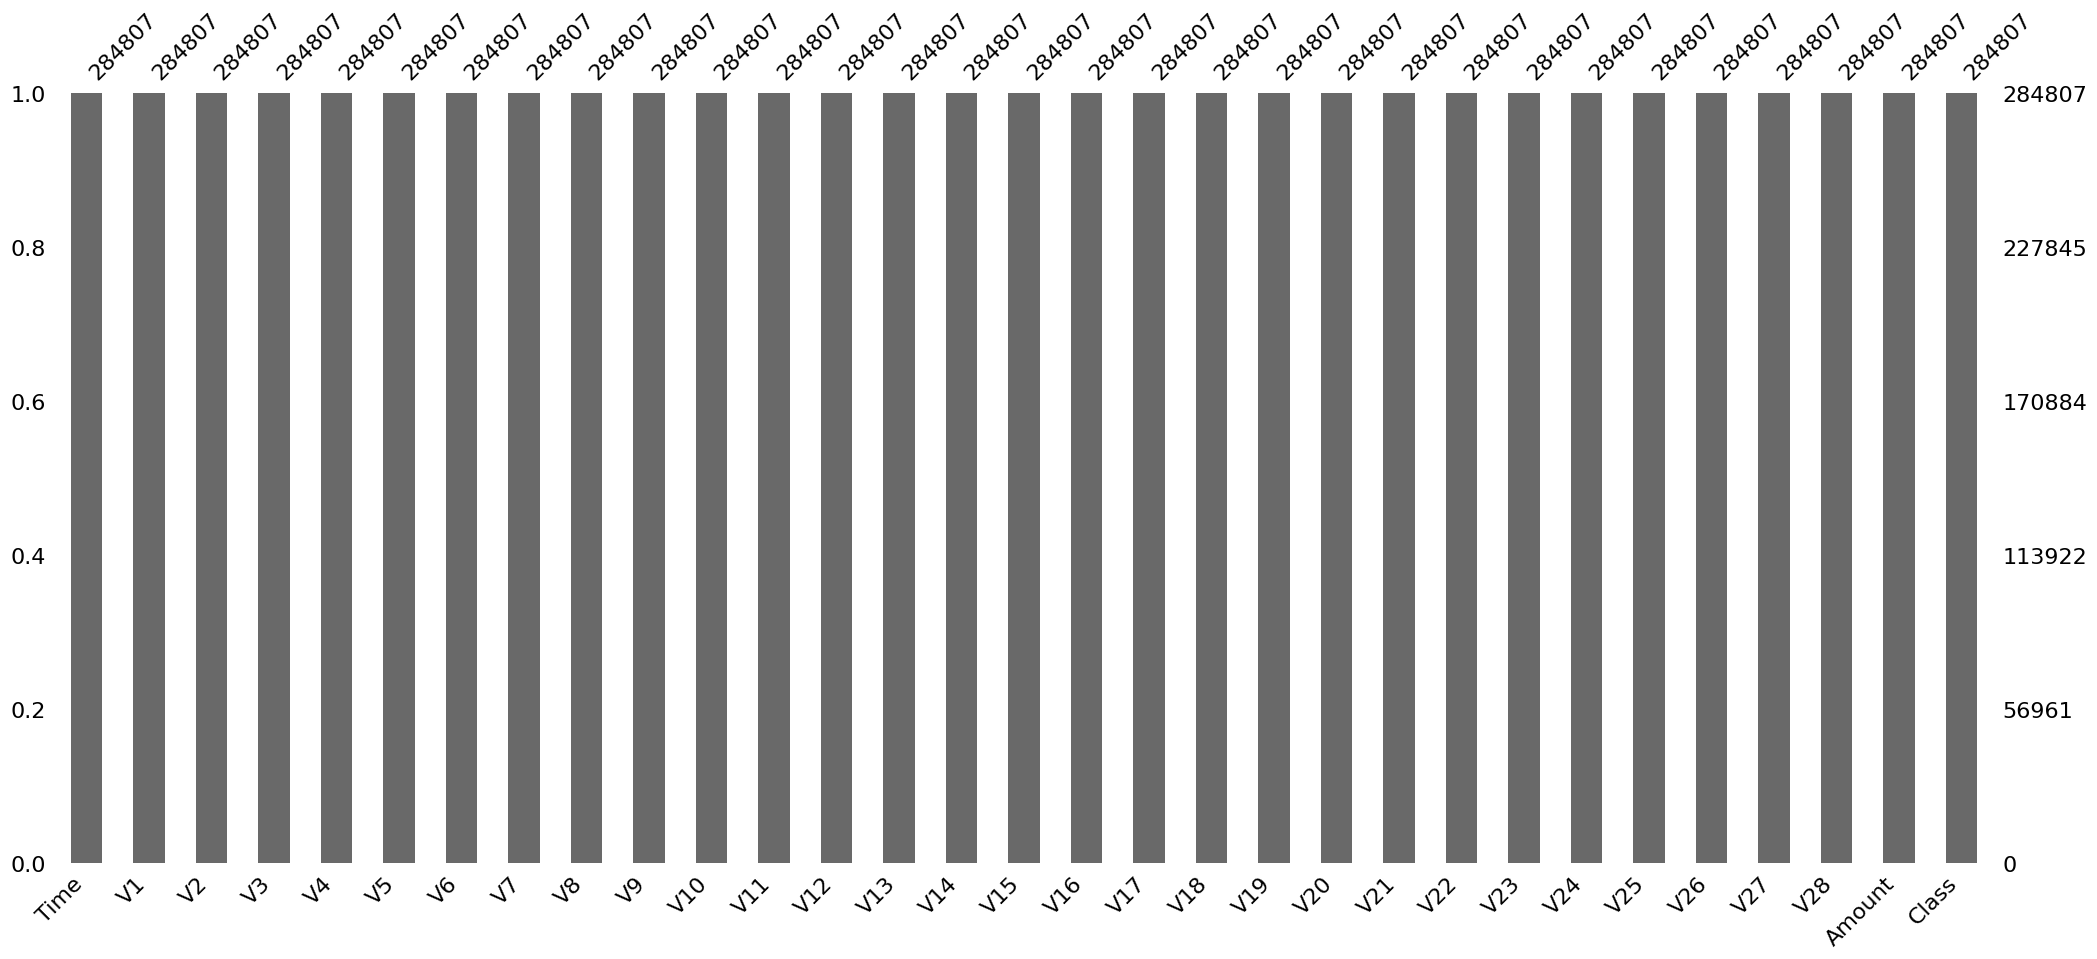

In [21]:
import missingno as msno
msno.bar(df)
plt.show()

In [22]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [23]:
lst=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

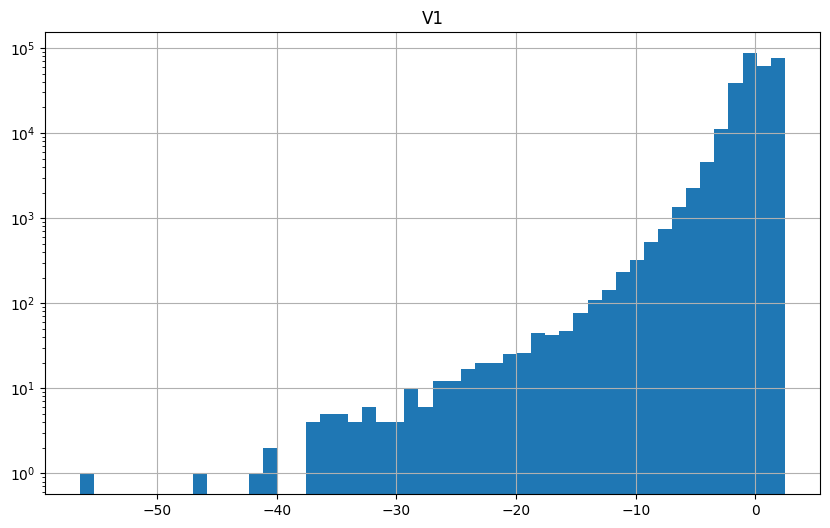

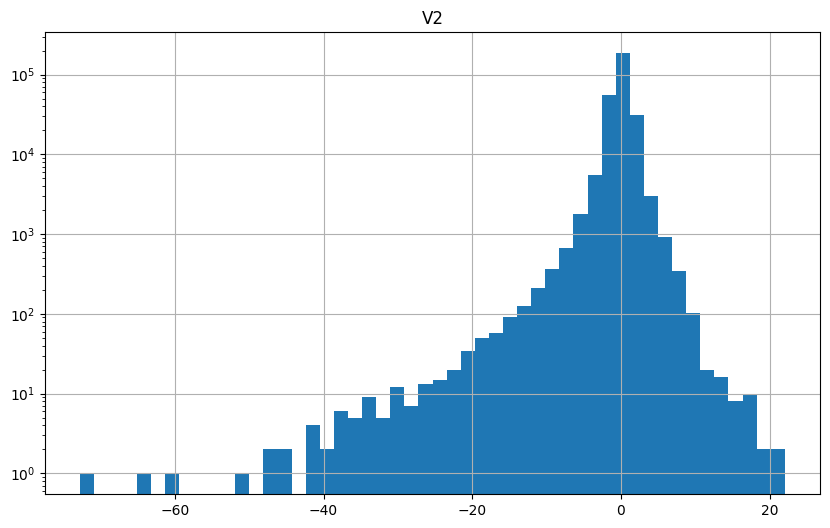

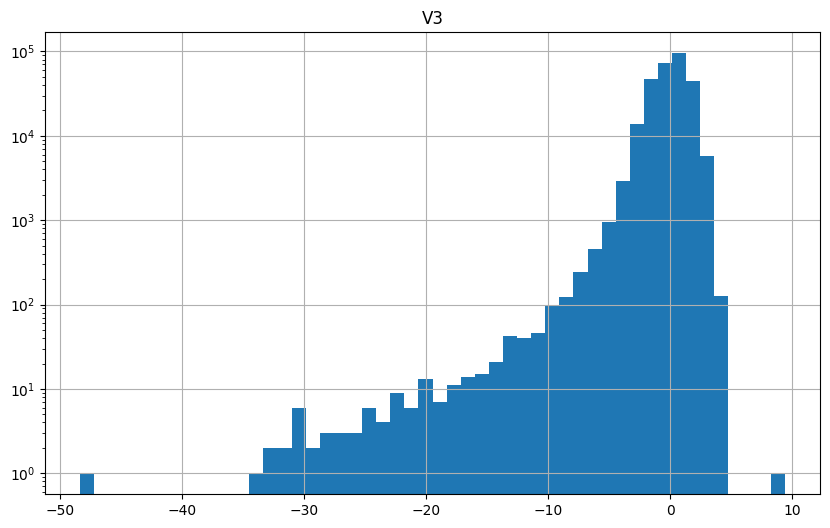

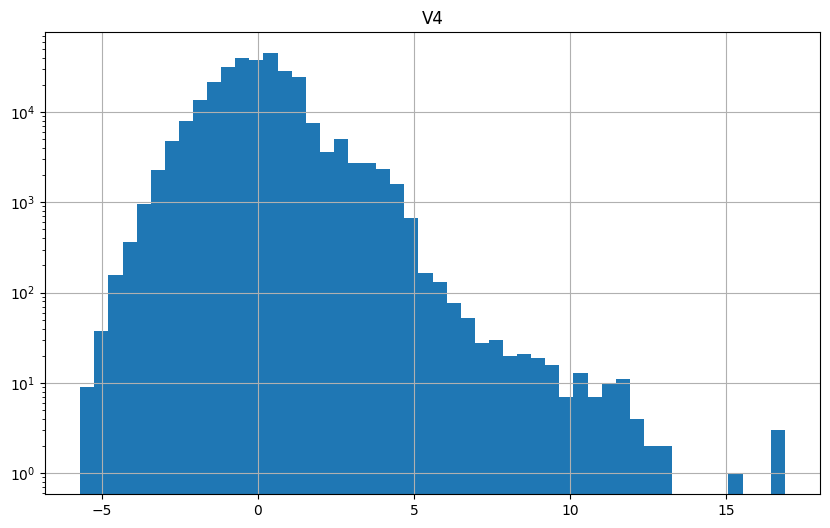

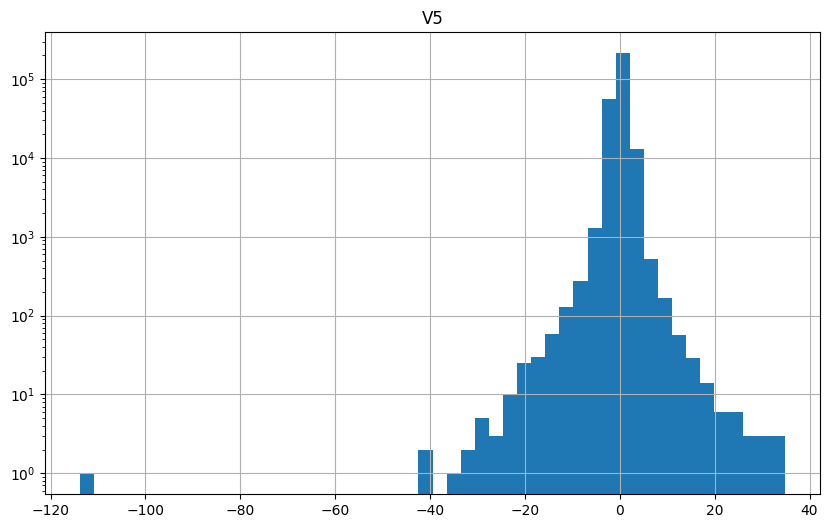

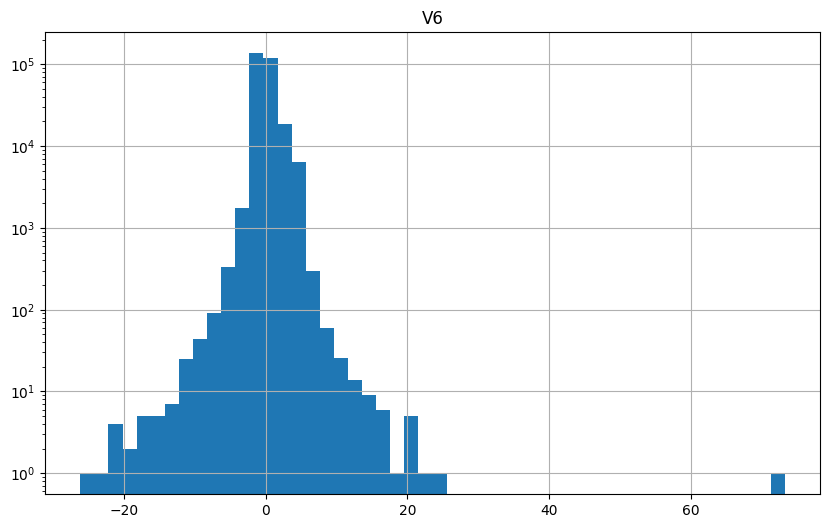

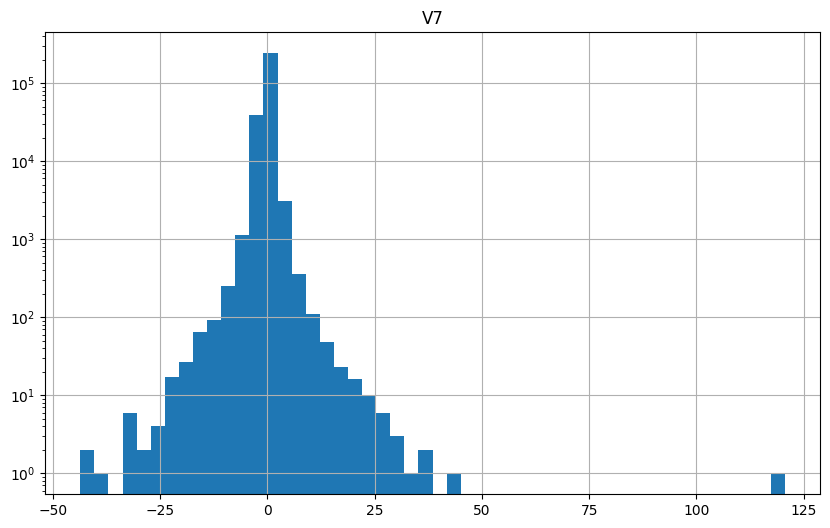

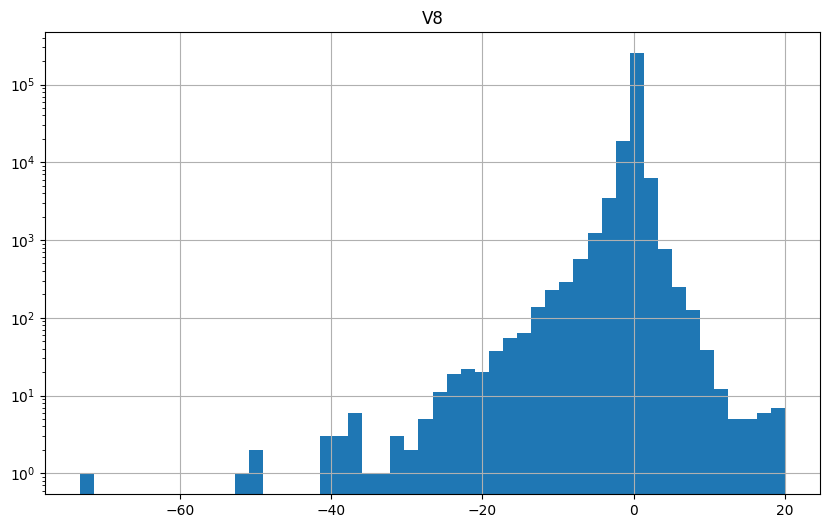

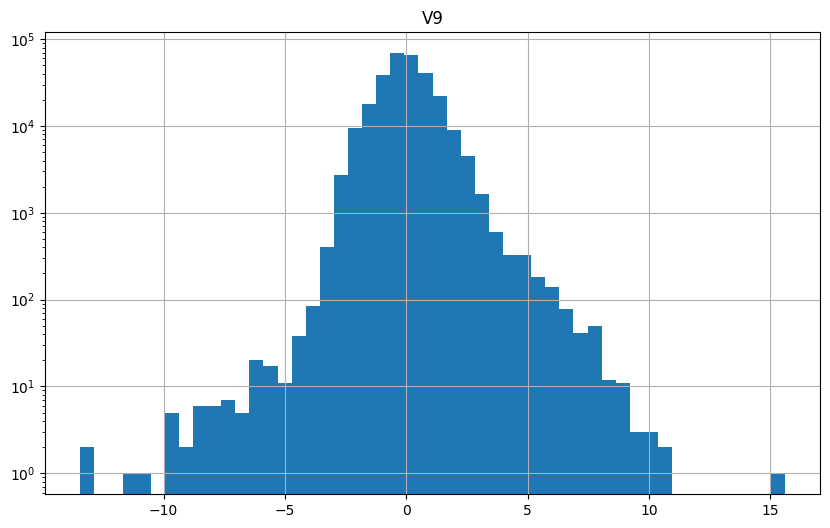

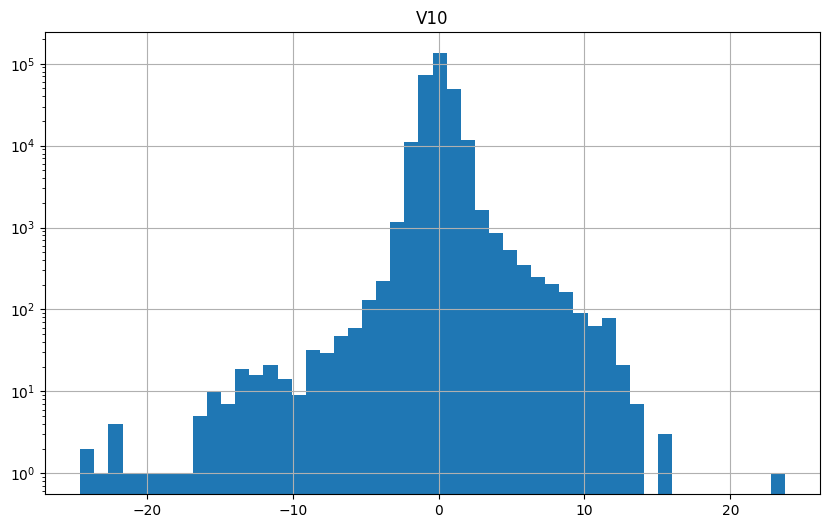

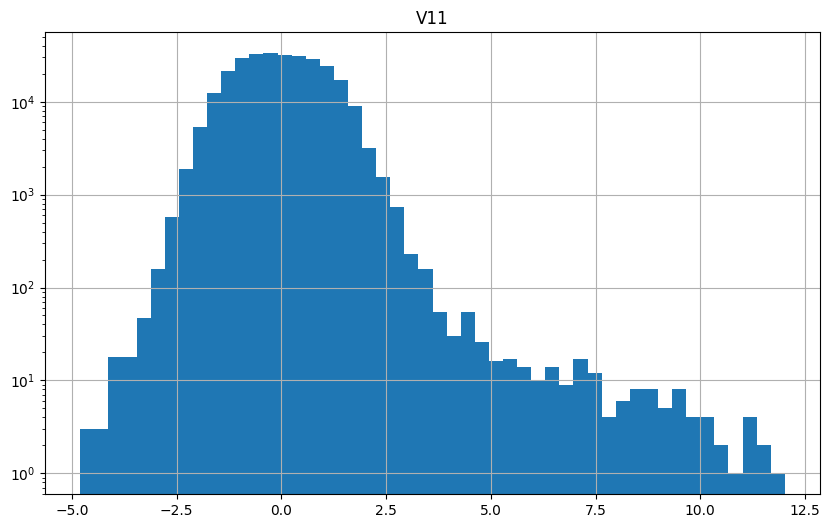

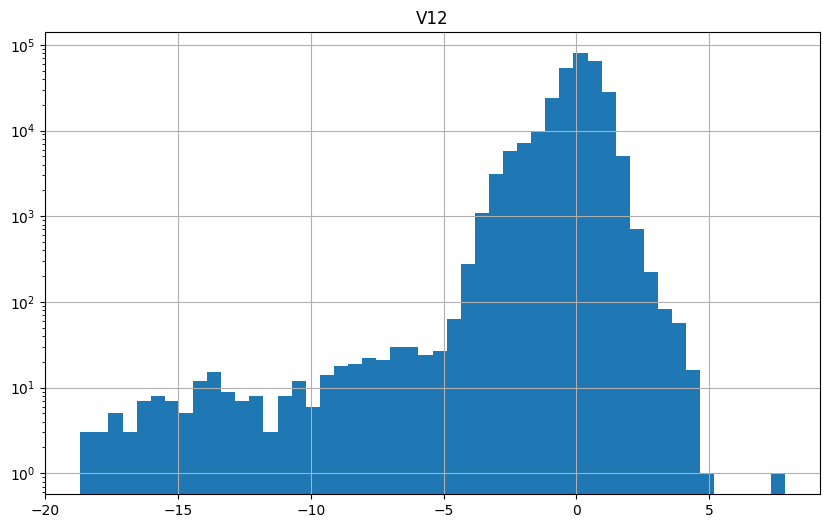

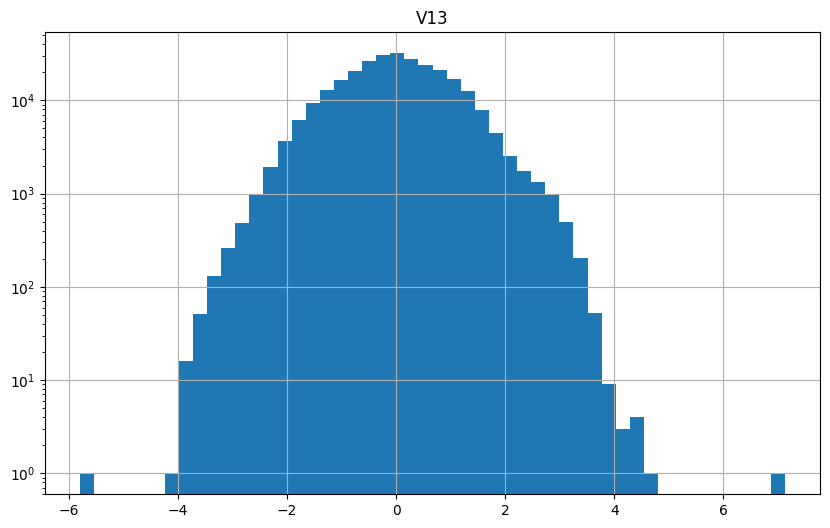

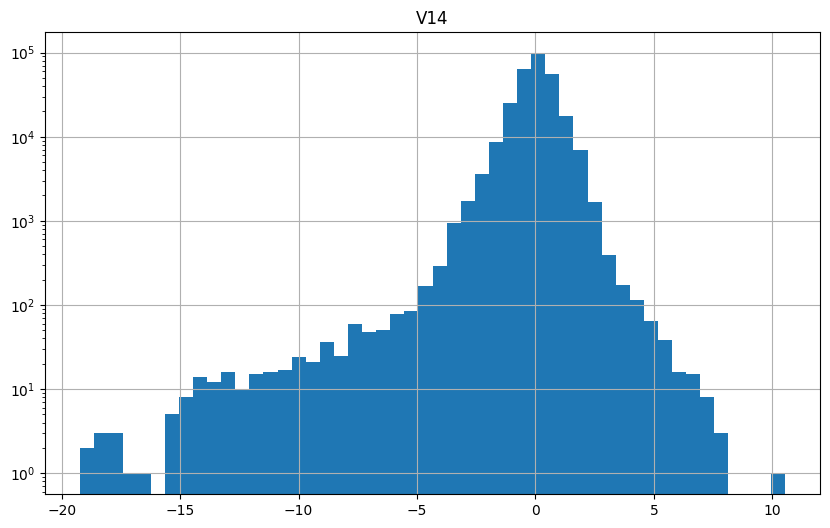

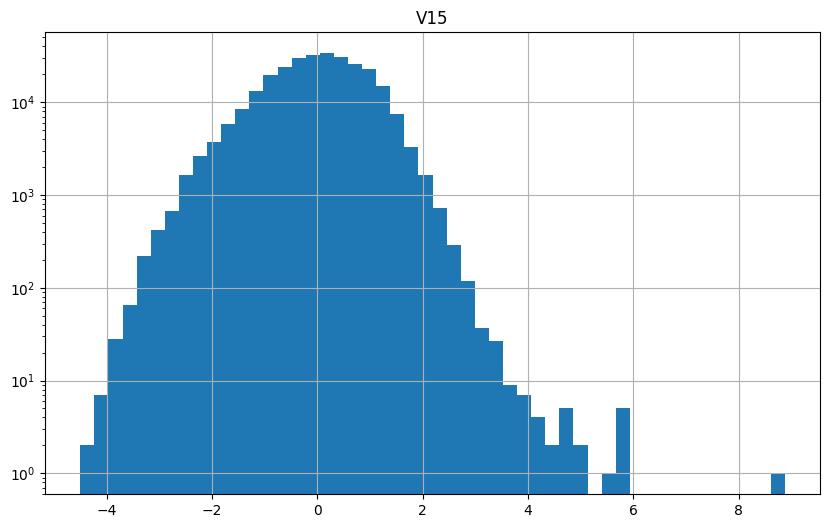

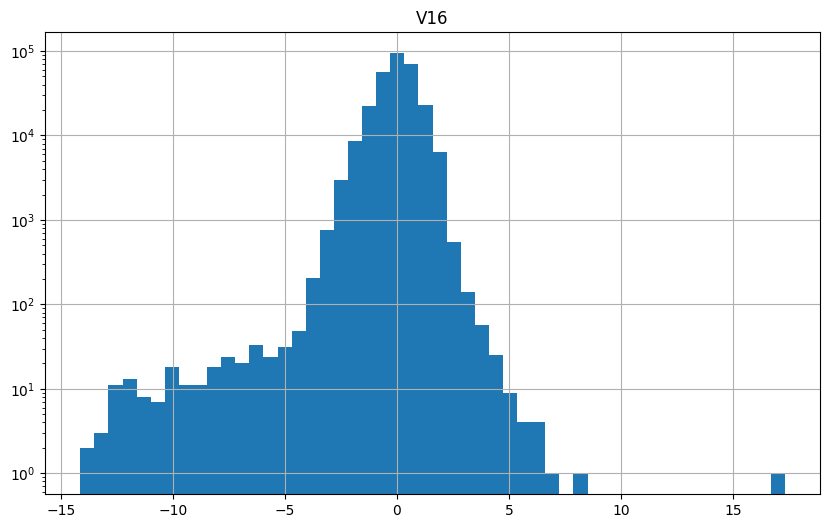

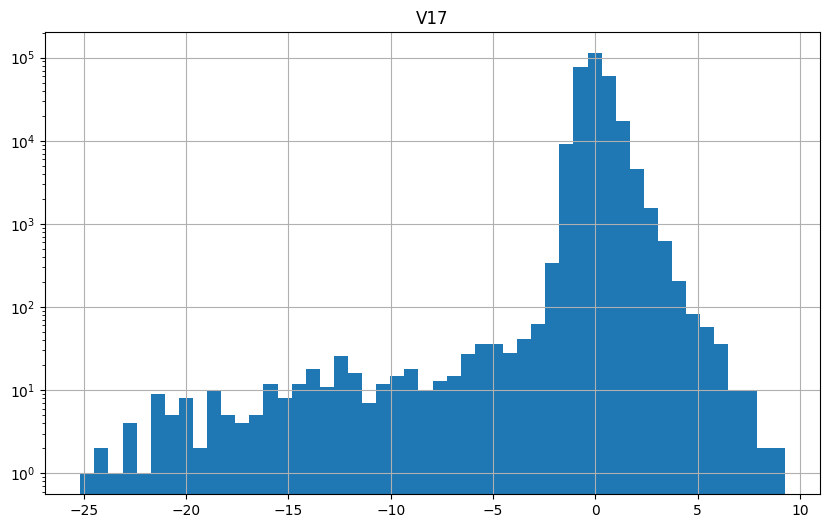

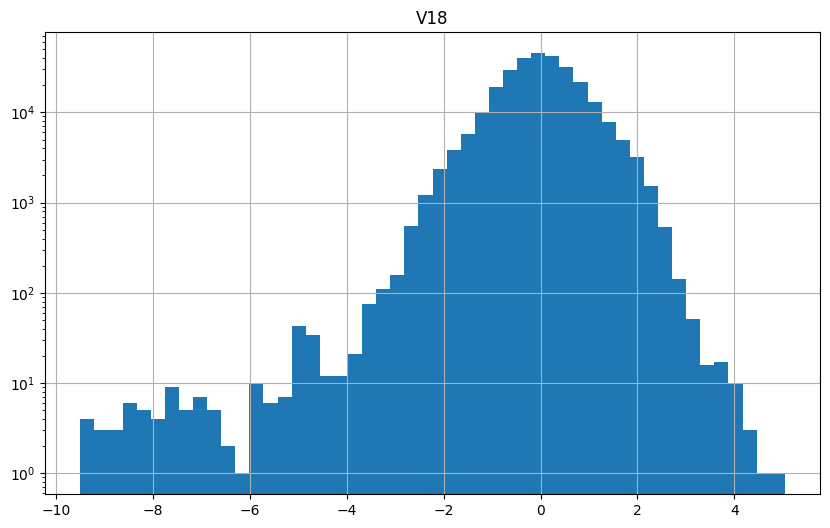

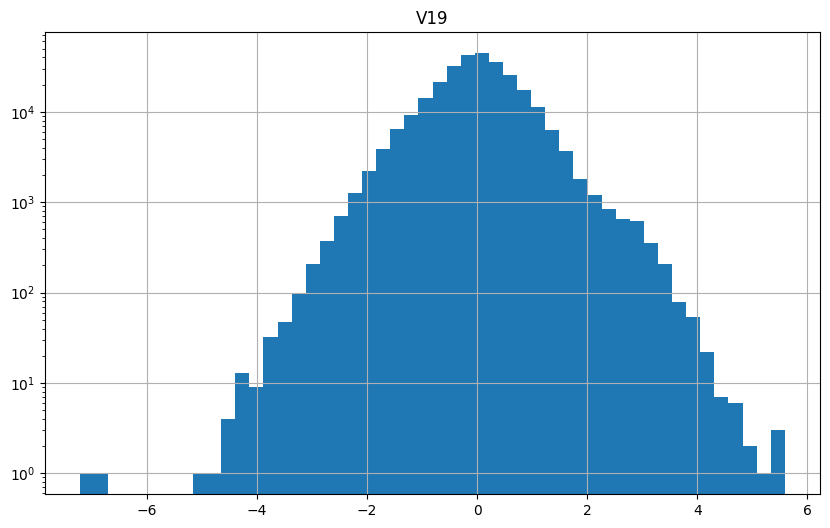

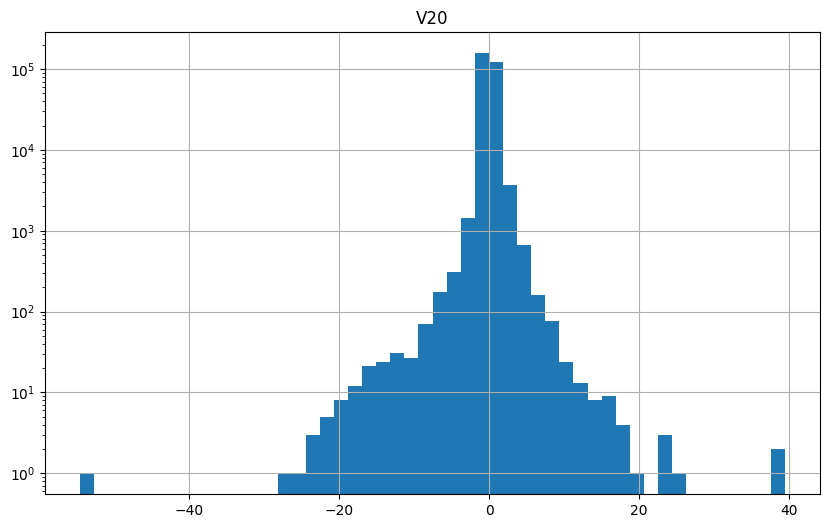

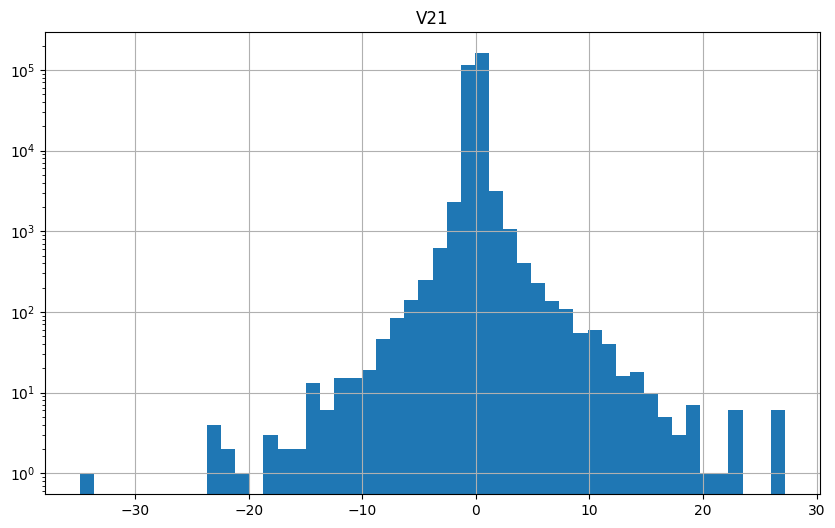

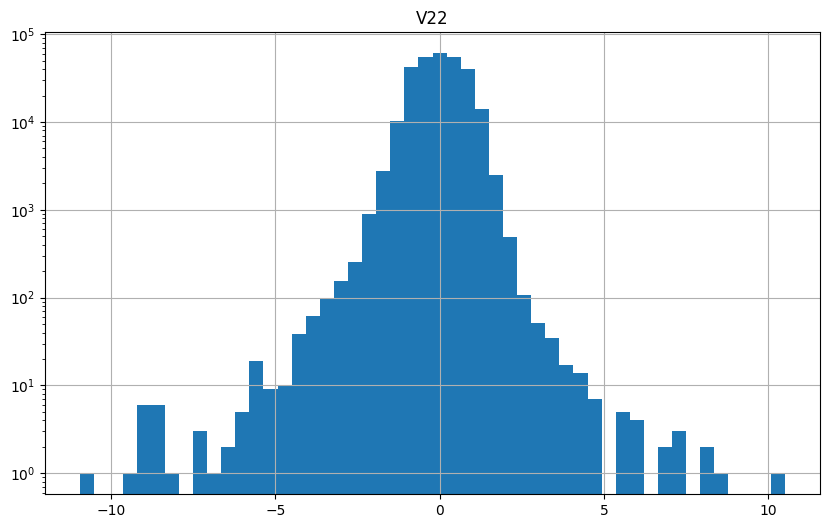

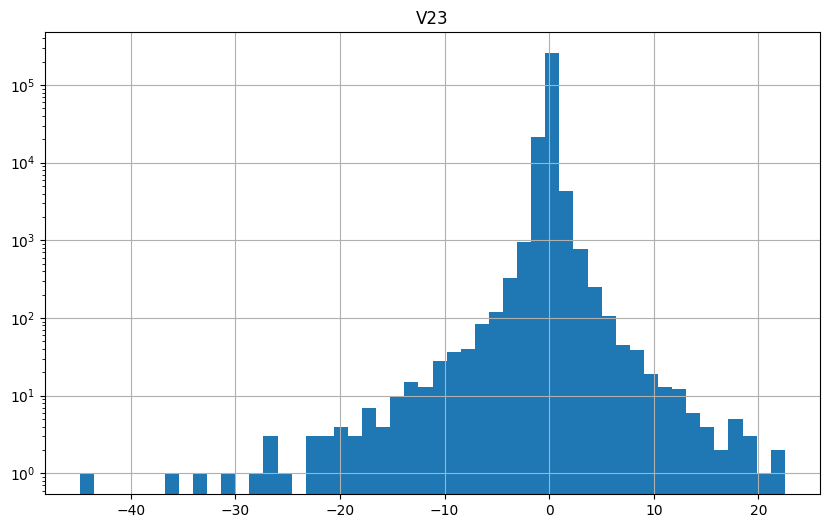

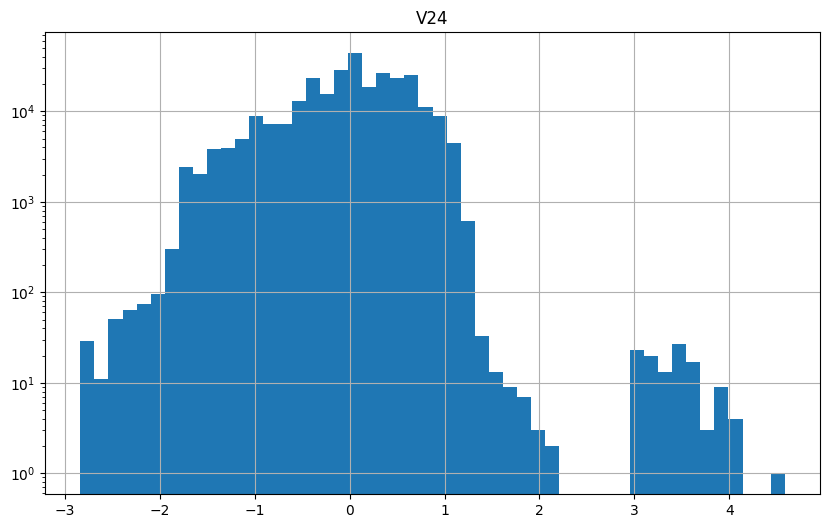

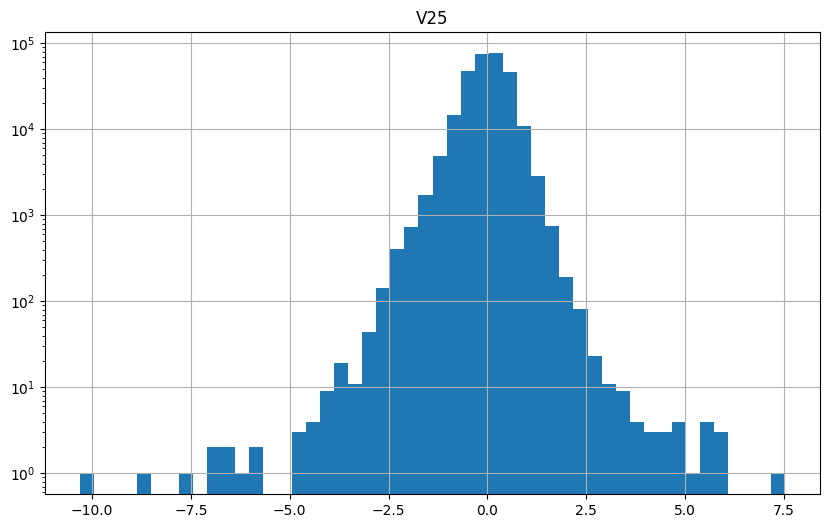

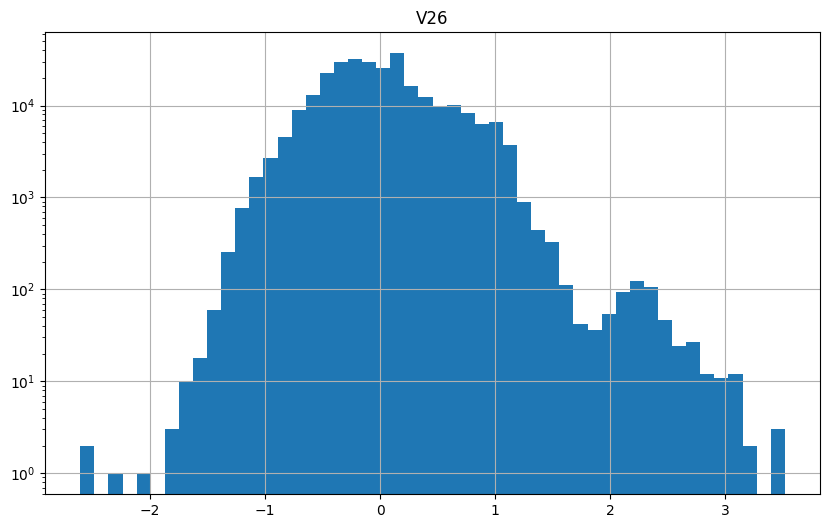

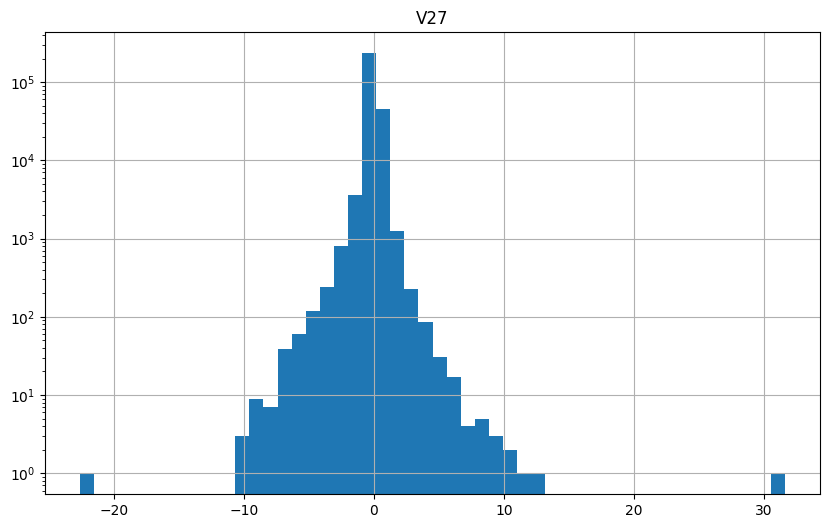

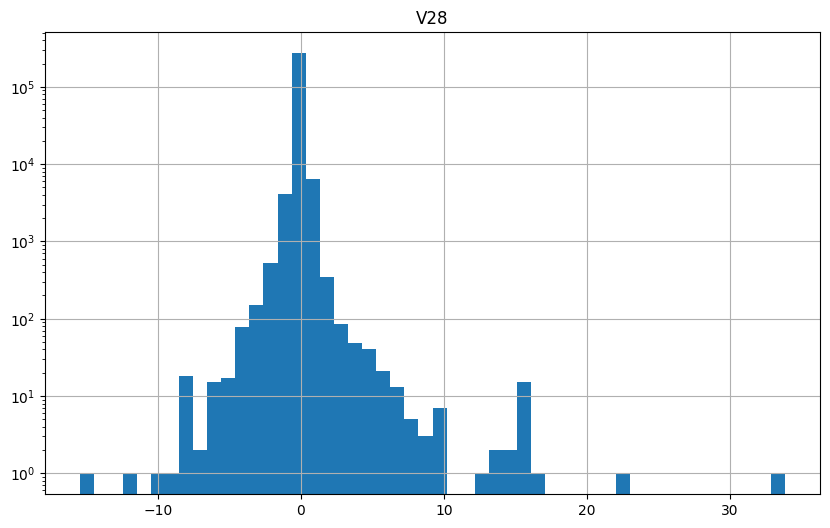

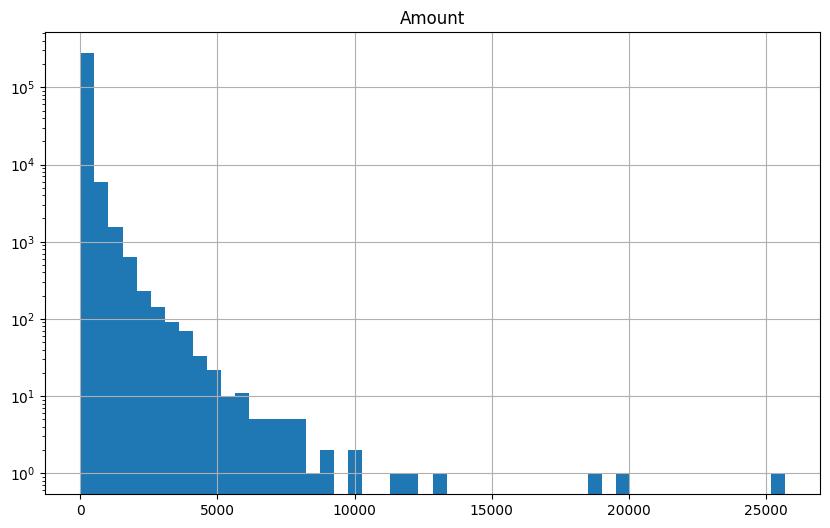

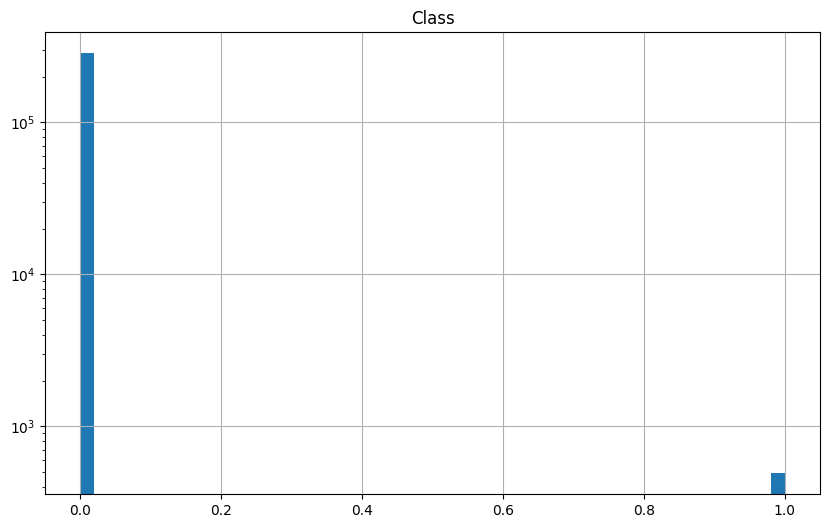

In [24]:
for i in lst[1:]:
    df[i].hist(bins=50,figsize=(10,6))

    plt.yscale('log')
    plt.title(i)

    plt.show()

In [25]:
df.drop(columns=['Time','Class'])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


<Axes: >

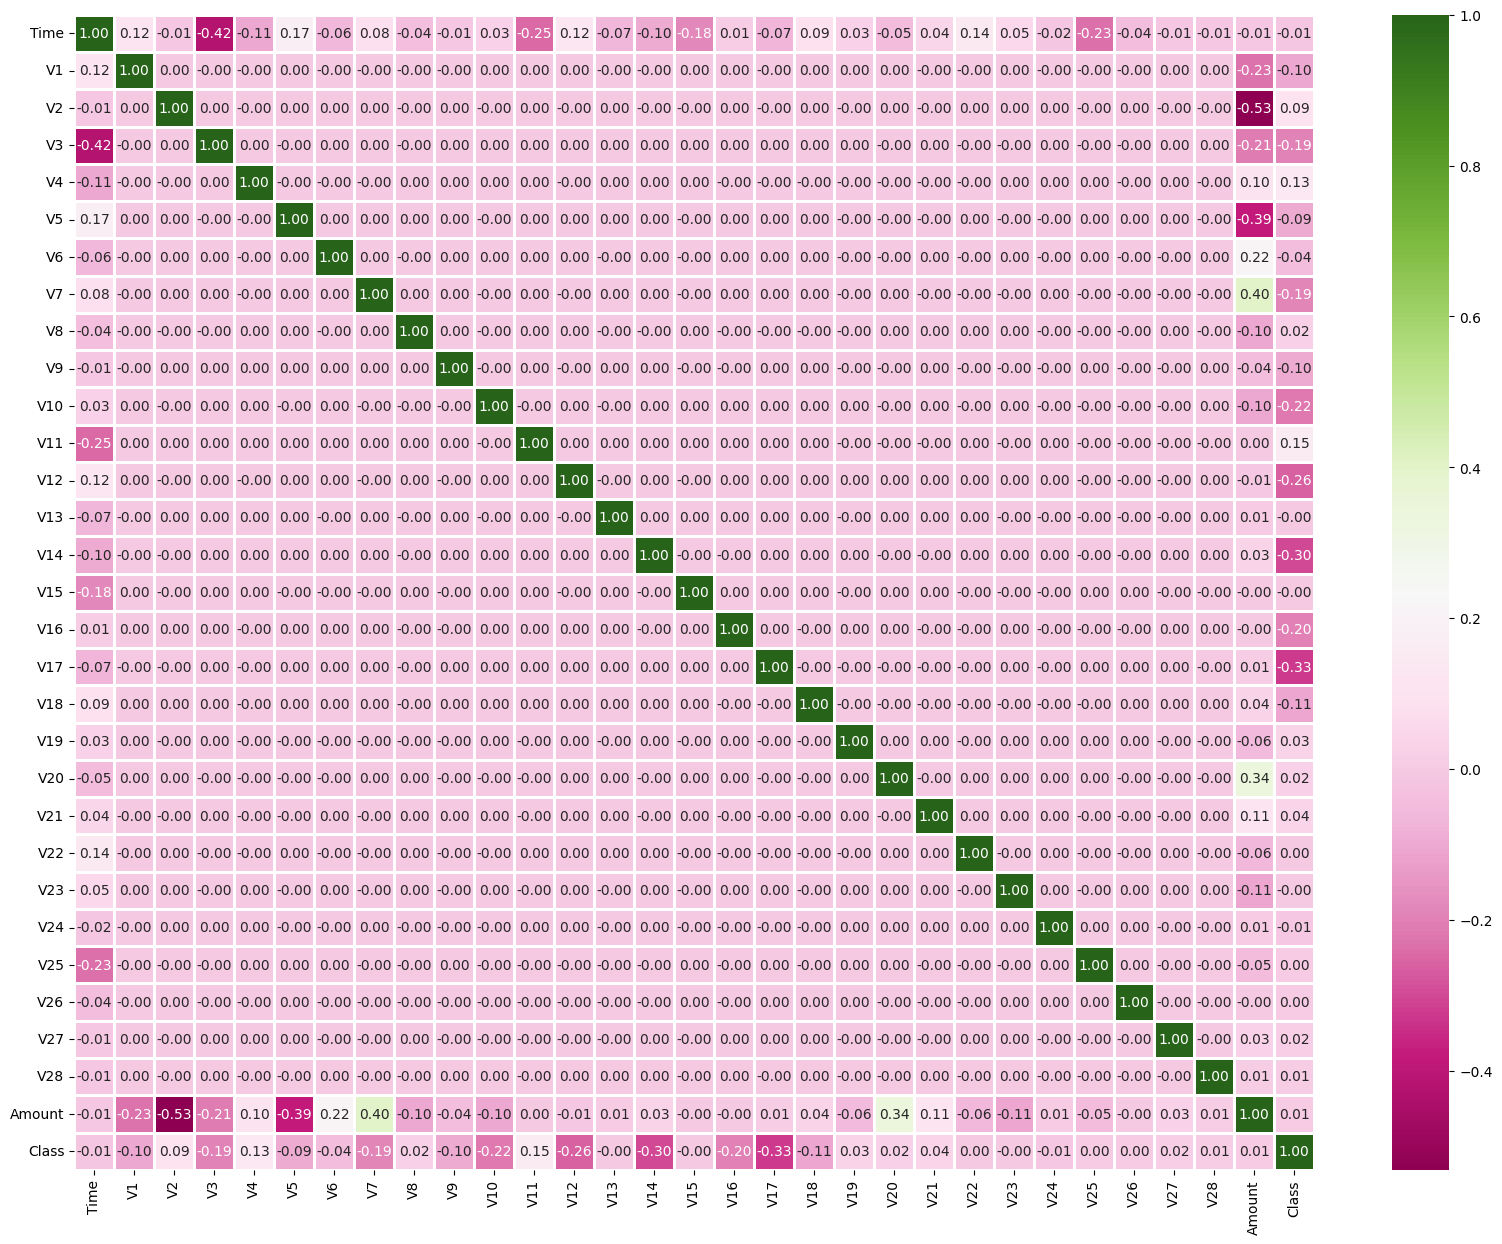

In [26]:
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(),cmap='PiYG',annot=True,linewidths=1,fmt='0.2f')

In [27]:
X = df.iloc[:,:-1]

y = df.iloc[:,-1]

In [28]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


Counter({0: 284315, 1: 492})


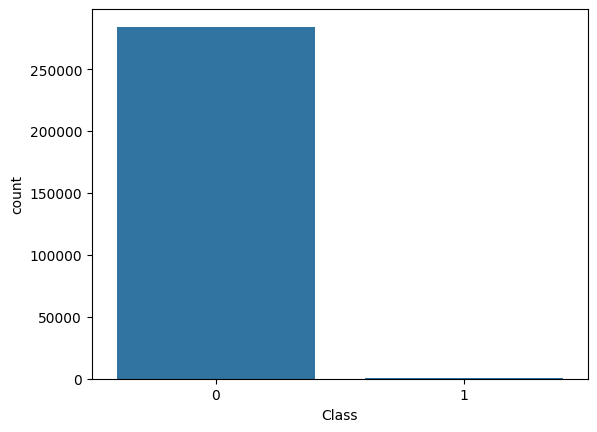

In [29]:
sns.countplot(x='Class', data = df)
from collections import Counter
counter = Counter( df [ 'Class' ])
print(counter)

In [30]:
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((227845, 31), (56962, 31), (227845,), (56962,))

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [34]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred=model.predict(x_test)
y_pred_proba=model.predict_proba(x_test)[:,1]

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
def classification_metric(y_test,y_pred,y_prob,label,n=1,verbose=False):
    cm = confusion_matrix(y_test,y_pred)
    row_sum = cm.sum(axis=0)
    cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
    col_sum = cm.sum(axis=1)
    cm = np.append(cm,col_sum.reshape(-1,1),axis=1)

    labels = label+['Total']

    plt.figure(figsize=(10,6))



    sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
                yticklabels=labels,linewidths=3,cbar=None,)


    plt.xlabel('Predicted Values')


    plt.ylabel('Actual Values')


    plt.title('Confusion Matrix')

    plt.show()

    print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
    cr = classification_report(y_test,y_pred)
    print(cr)

    print('\n'+'*'*36+'Kappa Score'+'*'*36+'\n\n')
    kappa = cohen_kappa_score(y_test,y_pred)
    print('Kappa Score =',kappa)

    print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
    roc_a = roc_auc_score(y_test,y_pred)
    plt.figure(figsize=(8,5))

    fpr,tpr, thresh = roc_curve(y_test,y_prob)

    plt.plot(fpr,tpr,'r')
    print('Number of probabilities to build ROC =',len(fpr))
    if verbose == True:
        for i in range(len(thresh)):
            if i%n == 0:
                plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
                plt.plot(fpr[i],tpr[i],'v')


    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title('Receiver Operating Characterstic')

    plt.legend(['AUC = {}'.format(roc_a)])

    plt.plot([0,1],[0,1],'b--',linewidth=2.0)
    plt.grid()
    plt.show()
class threshold():
    '''
    Setting up the threshold points
    '''
    def __init__(self):
        self.th = 0.5

    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:
            return 0

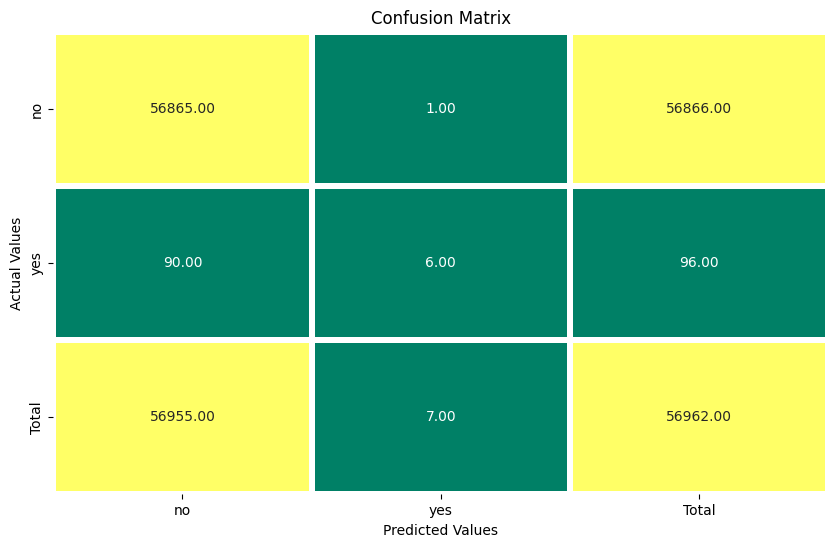

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.86      0.06      0.12        96

    accuracy                           1.00     56962
   macro avg       0.93      0.53      0.56     56962
weighted avg       1.00      1.00      1.00     56962


************************************Kappa Score************************************


Kappa Score = 0.1163024217567018

******************************Area Under Curve Score******************************


Number of probabilities to build ROC = 7


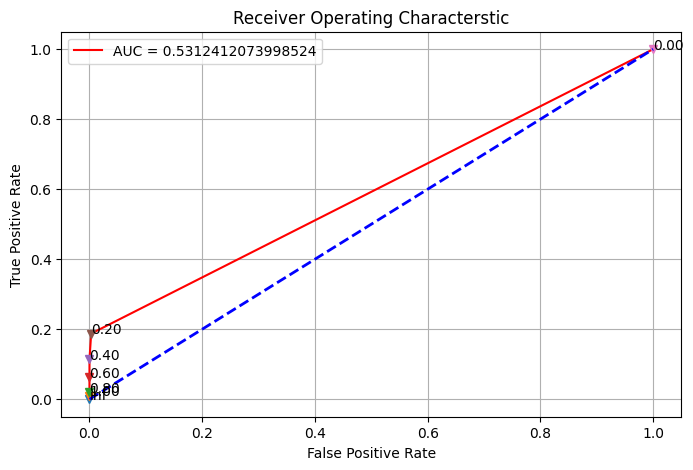

In [37]:
classification_metric(y_test,y_pred,y_pred_proba,['no','yes'],n=1,verbose=True)

In [38]:
import imblearn

from imblearn.over_sampling import SMOTE

In [39]:
x_resample,y_resample=SMOTE(k_neighbors=5).fit_resample(df,y)

In [40]:
x_resample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,58148.598711,-1.396534,2.950653,-1.973581,2.854183,0.935740,-1.489478,-0.879375,-0.778832,-2.372227,...,-0.162497,0.385855,-0.746480,0.030198,0.183219,-0.016805,0.234162,0.204202,3.308081,1
568626,75647.903389,-1.998945,1.364956,-1.946358,0.933010,-0.656234,-0.107713,-2.428197,-1.134449,-2.381615,...,-0.327753,0.882176,-0.220886,-0.909624,0.029645,0.089367,0.062285,0.369067,51.726430,1
568627,143007.797105,-2.069013,0.056107,-4.452041,4.050411,-0.343778,-1.122075,-3.400663,1.192106,-1.859668,...,0.624564,0.545136,0.689905,-0.057143,-0.843345,-0.493725,0.874441,0.152061,97.855985,1
568628,150138.543305,-4.613102,-0.475466,-4.704031,0.842244,-0.438683,-0.491306,-0.821211,-0.988162,-0.969033,...,0.086381,0.901343,0.148185,-0.082677,0.597931,-0.214169,0.036101,0.056877,151.739336,1


In [41]:
np.savez('credit_card_oversample.npz',x_resample,y_resample)

In [42]:
pd.Series(y_resample).value_counts()

,count
Class,
0,284315
1,284315


In [43]:
data_over=np.load('credit_card_oversample.npz')
data_over.files

['arr_0', 'arr_1']

In [44]:
x_over=data_over['arr_0']

y_over=data_over['arr_1']

In [45]:
pd.Series(y_over).value_counts()

,count
0,284315
1,284315


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.2)

In [47]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((454904, 31), (113726, 31), (454904,), (113726,))

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
model_over = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [50]:
model_over.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
y_pred=model_over.predict(x_test)
y_pred_prob=model_over.predict_proba(x_test)[:,1]

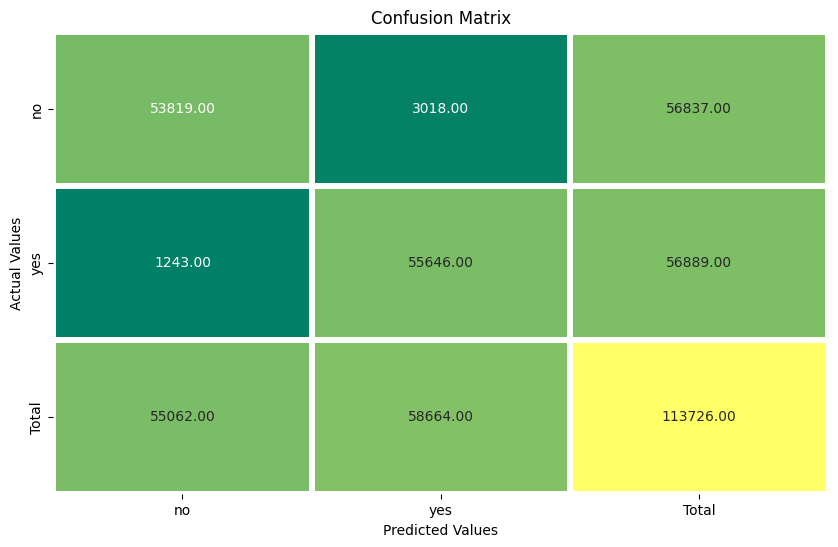

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.98      0.95      0.96     56837
           1       0.95      0.98      0.96     56889

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726


************************************Kappa Score************************************


Kappa Score = 0.925064423112555

******************************Area Under Curve Score******************************


Number of probabilities to build ROC = 7


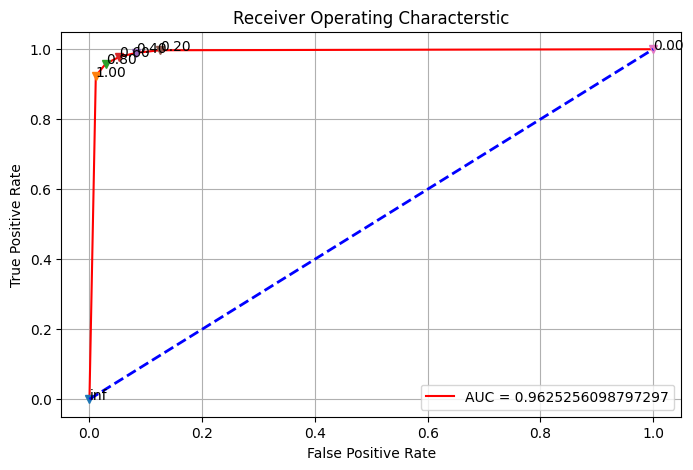

In [52]:
classification_metric(y_test,y_pred,y_pred_prob,['no','yes'],n=1,verbose=True)

In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.2)

In [54]:
np.random.seed(101)
from sklearn.model_selection import KFold

In [55]:
kfold=KFold(n_splits=5, shuffle=False)

In [56]:
cross_validation=[]
for train_index,test_index in kfold.split(x_train):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train_kf,x_test_kf=x_train[train_index],x_train[test_index]
    y_train_kf,y_test_kf=y_train[train_index],y_train[test_index]

    model_cv=KNeighborsClassifier(n_neighbors=5)
    model_cv.fit(x_train_kf,y_train_kf)

    acc=round(model_cv.score(x_test_kf,y_test_kf) * 100, 2)
    cross_validation.append(acc*100)

TRAIN: [ 90981  90982  90983 ... 454901 454902 454903] TEST: [    0     1     2 ... 90978 90979 90980]
TRAIN: [     0      1      2 ... 454901 454902 454903] TEST: [ 90981  90982  90983 ... 181959 181960 181961]
TRAIN: [     0      1      2 ... 454901 454902 454903] TEST: [181962 181963 181964 ... 272940 272941 272942]
TRAIN: [     0      1      2 ... 454901 454902 454903] TEST: [272943 272944 272945 ... 363921 363922 363923]
TRAIN: [     0      1      2 ... 363921 363922 363923] TEST: [363924 363925 363926 ... 454901 454902 454903]


In [57]:
cross_validation

[9569.0, 9562.0, 9574.0, 9560.0, 9570.0]

In [58]:
np.mean(cross_validation),pd.Series(cross_validation).var()

(9567.0, 34.0)

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logisreg = LogisticRegression()
logisreg.fit(x_train, y_train)
y_pred = logisreg.predict(x_test)
acc_logisreg = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logisreg )

Accuracy of Logistic Regression model :  97.48


In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

acc_lda = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Linear Discriminant Analysis Classifier: ', acc_lda )

Accuracy of Linear Discriminant Analysis Classifier:  93.29


In [61]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

acc_ganb = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes : ', acc_ganb )

Accuracy of Gaussian Naive Bayes :  86.83


In [62]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc_dtree = round( accuracy_score(y_test, y_pred) * 100, 2 )

print( 'Accuracy of  Decision Tree Classifier : ', acc_dtree )


Accuracy of  Decision Tree Classifier :  100.0


In [63]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc_rf = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Random Forest : ', acc_rf )

Accuracy of  Random Forest :  100.0


In [64]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest',
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf,  acc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,100.00
4,Random Forest,100.00
0,Logistic Regression,97.48
5,K - Nearest Neighbors,95.70
1,Linear Discriminant Analysis,93.29
2,Naive Bayes,86.83
